# British Airways Reviews Analysis

test adding text into github from google colab

### Import Initial Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


### Load Dataset

In [ ]:
df = pd.read_csv('BA_reviews.csv')

In [ ]:
df.head(1)

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | I have come to boarding and my cabin luggage was taken, ""because the plane is full"". I asked to take it to the cabin, because I have large notebook and electronics in it, but nothing changes. So, now I am sitting in the plane, holding notebook and several packs from my luggage, and think of how I will stand with all this stuff in my hands in a passport control line in Warsaw. Other people around me have come to the plane with cabin luggage!"


## Pre-Processing

In [ ]:
#Drop inmdex column
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
#Make new column of whether the trip is verified or not in the application
df['verification'] = df['reviews'].str.contains('✅')

#Label encoding for verification
df['verification'] = np.where(df['verification'] == True, 'Trip_Verified', 'Trip_not_Verified')

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['verification'] = le.fit_transform(df['verification'])

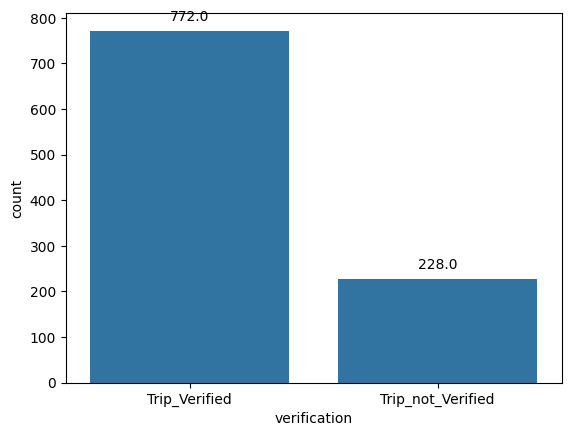

In [ ]:
# Countplot by verification
ax = sns.countplot(data=df, x='verification')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
df.head(1)

,reviews,verification
0,"✅ Trip Verified | I have come to boarding and my cabin luggage was taken, ""because the plane is full"". I asked to take it to the cabin, because I have large notebook and electronics in it, but nothing changes. So, now I am sitting in the plane, holding notebook and several packs from my luggage, and think of how I will stand with all this stuff in my hands in a passport control line in Warsaw. Other people around me have come to the plane with cabin luggage!",Trip_Verified


In [ ]:
# Replace the '✅ Trip Verified | ' prefix in reviews column
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)

### Import and install nltk library and packages

In [ ]:
# pip install textblob

In [ ]:
# import nltk
# nltk.download('all')

### Sentiment Analysis

In [ ]:
from textblob import TextBlob

df['polarity'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
df['polarity'].describe()

count    1000.000000
mean        0.066959
std         0.199649
min        -0.766667
25%        -0.048703
50%         0.052476
75%         0.182589
max         0.715000
Name: polarity, dtype: float64

<Axes: xlabel='polarity'>

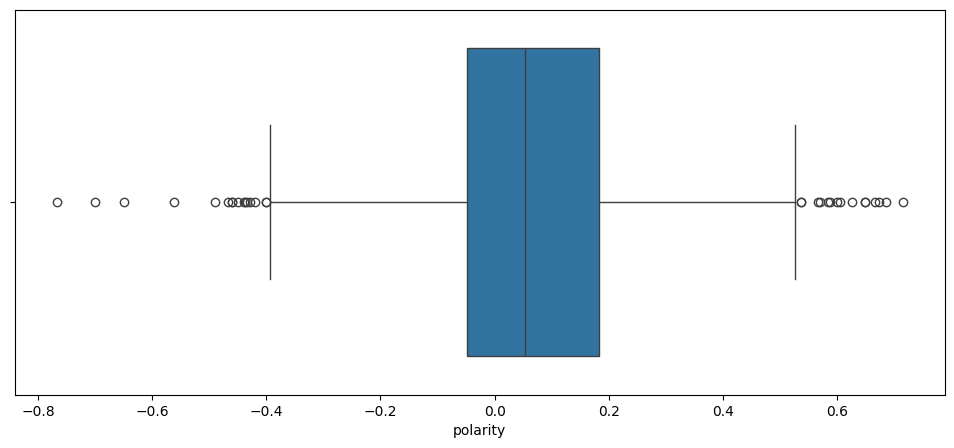

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x=df['polarity'])

Text(0, 0.5, 'Frequency')

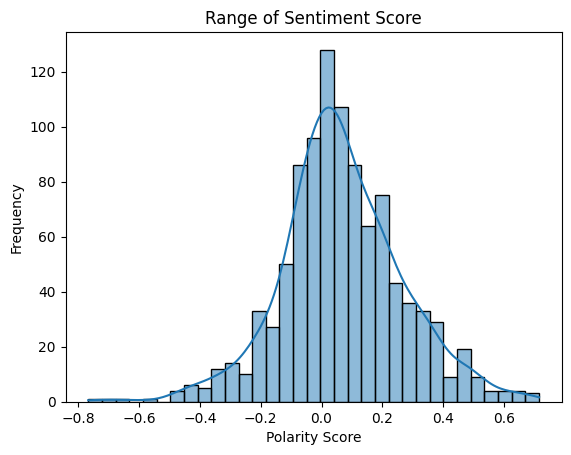

In [ ]:
# Distribution of sentiment score in all reviews
sns.histplot(data=df, x='polarity', kde=True)
plt.title('Range of Sentiment Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

In [ ]:
#Check top 10 reviews with the highest polarity to the verify result

df[['reviews', 'polarity']].sort_values(by='polarity', ascending=False).head()

,reviews,polarity
744,Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great cabin crew. Excellent Service.,0.715000
646,Hong Kong to London. Great airline indeed! Staff were friendly and helpful! The aircraft was very clean. The crews are diverse. Will definitely fly again.,0.686354
822,Edinburgh to Kuala Lumpur via London. I have just returned to KL from an extended visit in UK seeing family and friends. My return flight was BA033 from Heathrow to Kuala Lumpur on Monday 26th August 2019 at 21.10. I was greeted by the most delightful air hostess whose name I didn't quite catch. The point I wish to make is that she looked after me so well on the flight. She was exceptional. It really made the journey one of the best on board experiences I have had.,0.673333
721,Stockholm to London Heathrow. As always BA works excellent with service. On the ground and in the air. They still have a good gin aboard for a decent G&T and even if the meals in Business looks like the came from the 90's economy they taste great.,0.666667
376,"For this 5 hour 15 min flight, you are given a bag of potato chips, and a bottle of water. If you want to purchase more food and drink you do this via their app on your phone. Or like me you can pre-order weeks before you fly. However there is no guarantee you will get your order, mine never came, so after enquiring where the order was, they told me they had food for someone who was not on the plane, that someone was me it turned out. They also managed to lose my luggage. I am still waiting for them to contact me regarding it. I will never use them again.",0.650000


In [ ]:
#Check bottom 10 reviews with the lowest polarity to the verify result

df[['reviews', 'polarity']].sort_values(by='polarity', ascending=True).head()

,reviews,polarity
861,"Mykonos to London flight delayed and waiting to depart. They are not on time, be prepared to miss your connections, take off 2 hours late,. The staff is some of the worst I have had on airlines. You may be stuck on the runway and they won’t offer you any water. The worst business class experience I have had.",-0.766667
97,"The worst service ever, my baggage did not arrive on time. Both my flights were delayed. I will never fly them again. Even the food was bad and your service.",-0.700000
869,"Stockholm to London. Worst business class flight I have flown. Split seating for myself and my wife because apparently they were overbooked. The meal was inedible for me, and was the worst airline meal I have been served.",-0.650000
470,The food was awful. An over night early morning flight started with the offer of a terrible chicken wrap thing. Terrible. Then went to a Traditional Breakfast with disgusting sausage and inedible hash brown's. Such rubbish on BA.,-0.562500
163,"Absolutely horrible airline. Communication is terrible. Last minute delays, cancellations, seat changes with no communication. App and website user experience is years behind other airlines. Seats are cramped and uncomfortable. Overpriced. Would not fly again.",-0.489286


In [ ]:
#Make category for the reviews polarity scores ()

df['review_category'] = df['polarity'].apply(lambda x: 'good' if x > 0.052 else 'bad' if x < -0.052 else 'neutral')

In [ ]:
df.sample(10)

,reviews,verification,polarity,review_category
389,"I booked a flight for myself and my wife from Heathrow to Nairobi in Premium Economy using Frequent Flyer points. I then paid $205 to reserve two seats on our own, in a 2-4-2 configuration cabin, as I didn't want to sit in a row of 4 people if possible. A few weeks before our flight BA emailed me to say they had changed my seat selection. When I logged in to see my new seat selection I had been moved into a row of 4? The email also stated that if I wasn't happy with the new seat selection they had made for me, I could get a full refund of the money I had paid. I called to cancel the reservation, which they did, and I paid $200 cancelation fee and they refunded my frequent flyer miles. When I asked them to refund the fee for my seat reservation, they told me all seat reservation fees are non refundable. I read them the email they had sent me when they changed my reserved seats, but the repeated that seat reservations are always non refundable.",Trip_not_Verified,0.224747,good
189,"Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on the internet and not listed on their website. I had to google it and still got the run around when someone finally answered. Trust me, the number is a secret. #2 – When you FINALLY find a customer service number, there is a long wait and when or if someone answers, they will not resolve your issues. Instead, they pass the buck to whatever airlines that they sold your ticket to. NO ONE TAKES OWNERSHIP #4- What airlines operates 365 days a year and around the clock but doesn’t have customer service reps to help you, the customer? BRITISH AIRWAYS that’s who. #5 - They will cancel your flight without notice and not notify you, AT ALL. NO EMAIL, NO TEXT. #6- If you are not the primary on your ticket you will get no notifications or even if you are the primary, you may or may not get notifications. #7 - If you pay for seats and you pick them, it doesn’t matter, they will cancel your seats and not refund your money and then play stupid. #8 - The flight may be cheaper, but it is not once you are done paying for seats. #9- They will route to another partner airline and not notify you #10 – If you have a connecting flight, they will cancel one leg and not the other and NOT NOTIFY YOU. I will never use them again. And if this review helps one person that heeds my advice, then my job is done.",Trip_not_Verified,0.047209,neutral
684,"London to Johannesburg. Departure was slightly delayed by 50 mph gusts, but once away the flight was the usual comfortable experience on the upper deck. Seats 53J/K are some of the best as long as the galley is quiet. The dinner service was efficient and we were ready for sleep after a film. Cabin crew were pleasant and attentive. Toilets were kept clean throughout the flight. Arrival was 30 minutes behind time, but baggage collection and customs were mercifully quick, so we were in the SLOW lounge just 40 minutes after landing. Overall, a good flight.",Trip_not_Verified,0.185417,good
583,"After sixteen months of being

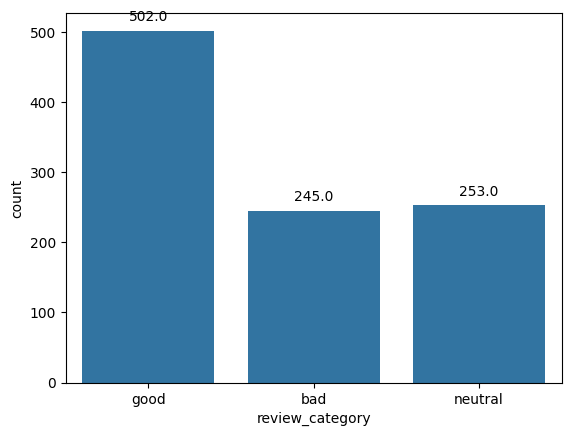

In [ ]:
# Countplot by Review Category
ax = sns.countplot(data=df, x='review_category')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

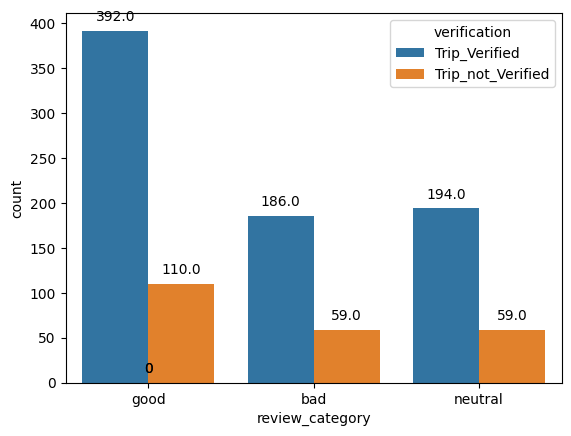

In [ ]:
# Countplot of Review Category by trip verification
ax = sns.countplot(data=df, x='review_category', hue='verification')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
#Label encoding for review category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['review_category'] = le.fit_transform(df['review_category'])

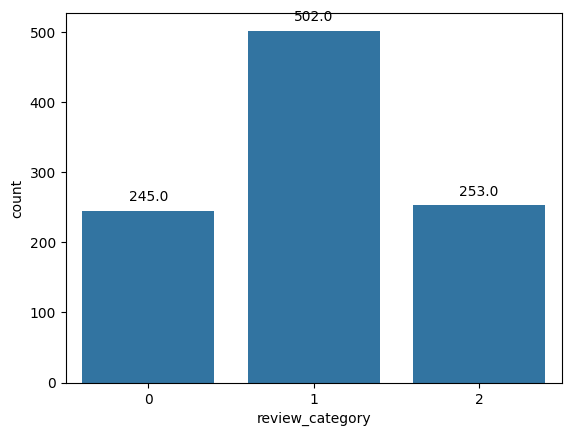

In [ ]:
# Countplot for label-encoded Review Category
ax = sns.countplot(data=df, x='review_category')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
#Checking final dataframe
df.sample(10)

,reviews,verification,polarity,review_category
931,"London to Aberdeen. Before boarding the flight I was forced to check in my bag at the gate because apparently the flight was full and I was boarding in Group 5. I was traveling with the permitted allowance and discussed with the lady at the Boarding Gate. I saw people boarding with Tax free bags on top of the other bags. Being almost the last on the plane, there was free spaces to accommodate bags. I was not happy because I had the permitted allowance.",Trip_Verified,0.097222,1
547,"I booked and paid for what I thought was a business class seat on a flight to Athens. What I got was a premium economy seat. The first nine rows were business class seats, rows 10 to 16 were what should have been the premium economy cabin (but had been added to the business class section) which had less comfortable seats that didn’t fully recline, unlike the seats in rows 1 to 9 (I was in row 11). This is not a case of me being snobby, but simply a point of principle and a clear case of BA mis-selling. Had I known prior that I would be paying the same business class price but for seats that were less comfortable than other business class passengers on the same flight, I wouldn’t have booked. I complained on board along with several other passengers who also resented being scammed in that way. I also made a formal complaint to BA but was fobbed off. Apparently this is a long running scam, I don’t know how they get away with it.",Trip_not_Verified,-0.001961,2
868,"The first part from Brussels to London Heathrow was a fast flight, however on the ground in London the problems started. The gate where the arriving plane was planned to stop was not free what occurred in a waiting time on the ground for 40 minutes. The captain constantly gave information and the entire team was friendly and courteous. Continental breakfast in business was OK for this short flight. Flight to Larnaca was full, embarkation was prompt for business pax. The team was very friendly. The service started with a drink and some cookies , the meal was good despite a more substantial appetiser could be expected - a few slices of green salad and one cherry tomato is a side dish not an appetiser. It must be said the meal was an improvement since last year. Decent drinks and a good Champagne were available, followed by coffee or tea. It is a longer flight - a second round of drinks an hour before landing was maybe appropriated however it was not a problem to receive additional drinks.",Trip_Verified,0.196780,1
176,My husband and I booked seats within our premium economy booking. On both outward journey BA015 on 12 February and return on 11 March we were last OR almost last to be served food. Each time they had run out of our choices. On one occasion I did not eat as only available option was curry which disagrees with me. On all flights there appeared to be an undue focus on curry/spicy food. All in all very disappointing and left us with a very poor opinion of British Airways.,Trip_Verified,-0.112500,0
472,"London to Dubai. Family of 6 kids where from 10 down to 6 years old, savvy travelers, been on many holidays so we were excited to be on BA for first time. But disappointment became desperation as we had not eaten anything since Dublin that morning at 7am. We had no time to eat at LHR so thought we'll get something usually around 1 hour into the flight. 3.5 hours after take off they served out food. Food was fine but nothing special, no issues with beverage, no attention to kids as you'd expect from many other airlines, even a kids book would be good. Movies are all outdated and already watched. So overall very medium experience.",Trip_Verified,0.124550,1
874,"Madrid to London with British Airways. There is nothing left of business class on these flights. When they bring the hot towel it feels like a bad joke. Seats are the same as coach, they took forever to hang my jacket after I asked in three occasions, they gave me a sit that is 